In [1]:
import matplotlib.pyplot as plt

import numpy as np
import torch

from models import LeNet
from datas import get_dataset_mnist

# Data Set

In [2]:
trainset, trainloader, testset, testloader, classes = get_dataset_mnist(32)
print(len(trainloader))

1875


# Model

In [3]:
in_dim, out_dim,  = 1, 4
model = LeNet(1, 10)

# Train

In [4]:
def get_model_dtype(model):
    return next(model.parameters()).dtype

In [5]:
model = model.to('cuda')
dtype = get_model_dtype(model)
losser = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())
total_losses = []
print(dtype)
num_epoch = 20

torch.float32


In [6]:
epoch_eval_losses = []
epoch_train_avg_loss = []
epoch_eval_accs = []
batch_losses = []
for epoch in range(num_epoch):
    epoch_train_losses = []
    for batch in trainloader:
        samples, labels = batch
        samples = samples.to('cuda', dtype=dtype)
        labels = labels.to('cuda', dtype=torch.long)
        pred = model(samples)
        loss = losser(pred, labels)
        optim.zero_grad()
        loss.backward()
        optim.step()
        epoch_train_losses.append(loss.item())

    num_samples, correct, eval_loss = 0, 0, 0
    for batch in testloader:
        with torch.no_grad():
            samples, labels = batch
            samples = samples.to('cuda', dtype=dtype)
            labels = labels.to('cuda', dtype=torch.long)
            model_output = model(samples)
            pred = torch.argmax(model_output, dim=-1)
            num_correct = torch.sum(pred == labels)
            num_samples += pred.shape[0]
            correct += num_correct
            eval_loss += torch.nn.functional.cross_entropy(model_output, labels, reduction='none').sum()
    
    epoch_train_losses = np.array(epoch_train_losses).mean()
    epch_eval_loss = eval_loss/num_samples
    epoch_eval_acc = correct / num_samples
    epoch_train_avg_loss.append(epoch_train_losses.item())
    epoch_eval_losses.append(epch_eval_loss.item())
    batch_losses.extend(epoch_train_avg_loss)
    epoch_eval_accs.append(epoch_eval_acc)
    print(f'epoch {epoch}, train avg loss {epoch_train_losses}, eval loss {epch_eval_loss: .02f}, eval acc {epoch_eval_acc: .02f}')

epoch 0, train avg loss 0.684077401004235, eval loss  0.20, eval acc  0.94
epoch 1, train avg loss 0.16501367099185785, eval loss  0.12, eval acc  0.96


KeyboardInterrupt: 

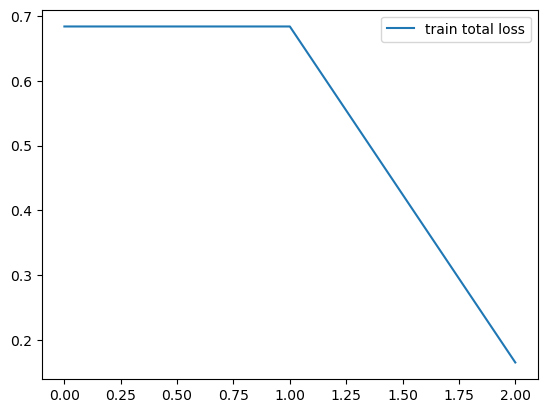

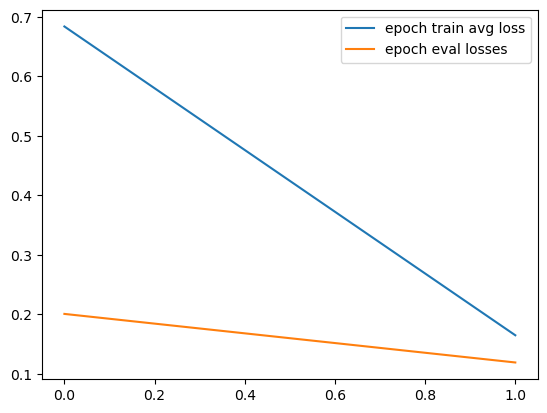

In [7]:
plt.plot(batch_losses, label='train total loss')
plt.legend()
plt.show()

plt.plot(epoch_train_avg_loss, label='epoch train avg loss')
plt.plot(epoch_eval_losses, label='epoch eval losses')
plt.legend()
